In [1]:
cd ../..

/home/tsunn/Workspace/free/Neural-Network-Approximation


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from data.generators import *
from utils.trainer import train_model
from utils.evaluator import evaluate_model
from utils.visualizer import *
from utils.maths import *
from model.simple_model import ReLU_Network
from typing import Callable

/home/tsunn/anaconda3/envs/nna/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
FUNCTION = lambda x: x**2
A = 0
B = 1

In [4]:
X_train, X_val, y_train, y_val = generate_1d_convex(n_samples=1024,
                                                    interval=(A, B),
                                                    func=FUNCTION)

train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
val_dataset = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [5]:
input_dim = 1
hidden_layers = 8
hidden_units = 16
output_dim = 1

model = ReLU_Network(input_dim, hidden_layers, hidden_units, output_dim)
history = train_model(model, train_loader, val_loader, epochs=128, lr=0.01, device='cpu')

Training Configurations:
Device: cpu
Epochs: 128
Learning Rate: 0.01



Training: 100%|██████████| 128/128 [00:02<00:00, 45.26epoch/s]


In [6]:
test_dataset = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
y_pred, y_actual = evaluate_model(model, test_loader, device='cpu')

Evaluation Configurations:
Device: cpu



Evaluating: 100%|██████████| 7/7 [00:00<00:00, 4458.64batch/s]


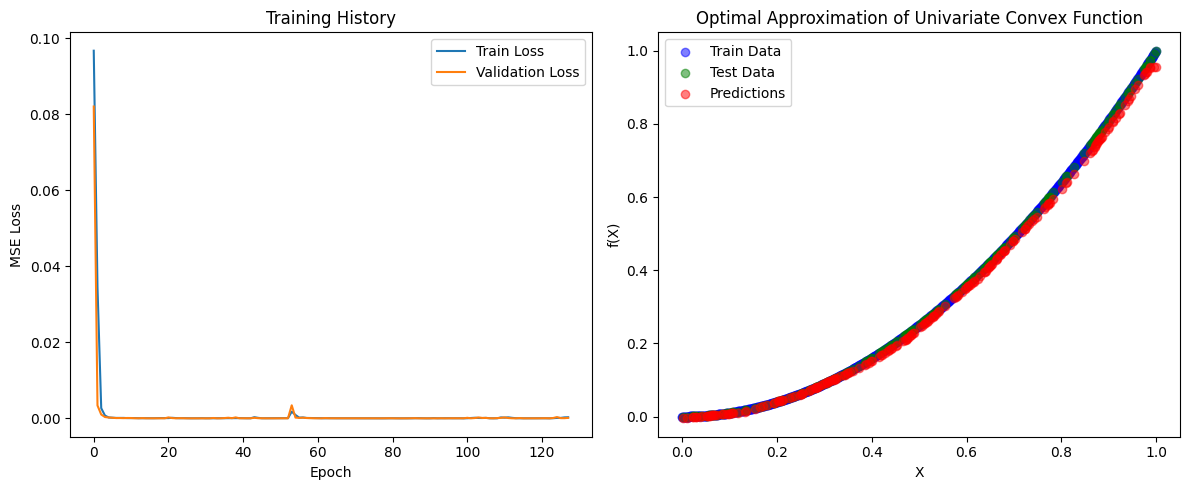

In [7]:
plot_results_1d(
    X_train, y_train, X_val, y_val, y_pred,
    history,
    title='Optimal Approximation of Univariate Convex Function'
)

In [8]:
error = compute_approximation_error(f=FUNCTION, interval=(A, B))
error["error"]

0.125

### Why is the error $\Delta(S^*) = 0.125$ ?

The optimal approximation error for a convex univariate function is calculated using the formula:

$$
\Delta(S^*) = \frac{c-a}{2} \left[f'(c) - f'(d)\right]
$$

#### Given
1. The function is $f(x) = x^2$, defined over the interval $[0, 1]$.
2. The derivative of the function is $f'(x) = 2x$.

We aim to calculate the **optimal approximation error** $\Delta(S^*)$ for the function $f(x) = x^2$ over the interval $[0, 1]$.

---

#### Step 1: Compute \( c \)

From the formula for \( c \):

$$
f'(c) = \frac{f(b) - f(a)}{b-a}
$$

Substitute the values:
- $f(b) = 1^2 = 1$
- $f(a) = 0$
- $b - a = 1 - 0 = 1$

Thus:

$$
f'(c) = \frac{1 - 0}{1} = 1
$$

Since $f'(x) = 2x$, we have:

$$
2c = 1 \quad \Rightarrow \quad c = 0.5
$$

---

#### Step 2: Compute $d$

From the formula for $d$:

$$
f'(d) = \frac{f(c) - f(a)}{c-a}
$$

Substitute the values:
- $f(c) = (0.5)^2 = 0.25$
- $f(a) = 0$
- $c - a = 0.5 - 0 = 0.5$

Thus:

$$
f'(d) = \frac{0.25 - 0}{0.5} = 0.5
$$

---

#### Step 3: Compute \( \Delta(S^*) \)

Using the formula for \( \Delta(S^*) \):

$$
\Delta(S^*) = \frac{c-a}{2} \left[f'(c) - f'(d)\right]
$$

Substitute the values:
- $c - a = 0.5 - 0 = 0.5$
- $f'(c) = 1$
- $f'(d) = 0.5$

Thus:

$$
\Delta(S^*) = \frac{0.5}{2} \left[1 - 0.5\right]
$$

Simplify:

$$
\Delta(S^*) = \frac{0.5}{2} \cdot 0.5 = 0.125
$$

---

### Conclusion

The optimal approximation error is:

$$
\Delta(S^*) = 0.125
$$

This result is derived from the specific properties of the function $f(x) = x^2$ and the optimal conditions for piecewise linear approximation over the interval $[0, 1]$.


$\bold{Lemma 2}$: For convex functions $f(x)$, if one enlarges $[a, b]$ by moving the endpoint $b$ to the right, or $a$ to the left, the optimal approximation error $\Delta(S^*)$ of the function $f(x)$ by a line segment S(x) will increase. On the contrary, if one reduces the interval $[a, b]$ by moving the endpoint $b$ to the left, or $a$ to the right, the optimal approximation error $\Delta(S^*)$ will decrease.

In [9]:
a, b = -1, 2 # move b to the right, and a to the left
error = compute_approximation_error(f=FUNCTION, interval=(a, b))
error = error["error"]
print(f"\nTheoretical Approximation Error: {error}, larger than before")


Theoretical Approximation Error: 1.125, larger than before


In [10]:
a, b = 0, 0.7 # move b to the left
error = compute_approximation_error(f=FUNCTION, interval=(a, b))
error = error["error"]
print(f"\nTheoretical Approximation Error: {error}, smaller than before")


Theoretical Approximation Error: 0.06124999999999999, smaller than before


#### Sufficient Conditions:
Once the chain of equalities holds, any movements of interior endpoints will cause ${\Delta(f'_n)}$ to increase, and subsequent sewing neighboring segments at common endpoints to make $f_n$ be continuous will increase ${\Delta(f'_n)}$ further. Therefore, the chain of equalities below is sufficient for optimal approximation.

$$
    \Delta(S^*_1) = \Delta(S^*_2) = \Delta(S^*_3) = \cdots = \Delta(S^*_n) = \Delta(f^*_n)
$$

#### Uniqueness:

We will prove it by contradiction. 
Assume there are two different optimal piecewise linear functions with the same approximation errors. Geometrically, there must exist two intervals with one of them being included in another, such as $[a, e]$ and $[a, e_1]$ due to the fact that endpoints $a$ and $b$ are fixed. 

By the assumption that the two configurations have equal optimal approximation errors and the optimality conditions, one has 
$$
\Delta(f^*_3) = \Delta(S^*_{\substack{ae}}); \Delta(f^*_3) = \Delta(S^*_{\substack{ae_1}}) \quad \tag{3.15}
$$
However, $[a, e]$ and $[a, e_1]$ have different lengths, by lemma 2 which claims the monotony of optimal approximation error with respect to interval length, we have
$$
\Delta(S^*_{\substack{ae}}) \neq \Delta(S^*_{\substack{ae_1}}),
$$
which contradicts $(3.15)$. As a result, the optimal approximation $f^*_n(x)$ is unique.